In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.regularizers import l2
import os

# Define paths
base_dir = r'E:\Project\hair diseases detection\Gaussian Filter\gaussian_augmented_images'  # Adjust this path
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 100
num_classes = 11  # Adjust according to your dataset

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the InceptionV3 model, pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # Reduced dropout rate
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Apply L2 regularization
predictions = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(x)  # Apply L2 regularization

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save('inception_v3_finetuned_L2.h5')


Found 52800 images belonging to 11 classes.
Found 6600 images belonging to 11 classes.
Found 6600 images belonging to 11 classes.
Epoch 1/100
1650/1650 [==============================] - 874s 528ms/step - loss: 9.3830 - accuracy: 0.5208 - val_loss: 5.0366 - val_accuracy: 0.6823
Epoch 2/100
1650/1650 [==============================] - 855s 518ms/step - loss: 3.7015 - accuracy: 0.6208 - val_loss: 2.3771 - val_accuracy: 0.7473
Epoch 3/100
1650/1650 [==============================] - 865s 524ms/step - loss: 2.1755 - accuracy: 0.6521 - val_loss: 1.5831 - val_accuracy: 0.7542
Epoch 4/100
1650/1650 [==============================] - 853s 517ms/step - loss: 1.6553 - accuracy: 0.6707 - val_loss: 1.3204 - val_accuracy: 0.7570
Epoch 5/100
1650/1650 [==============================] - 850s 515ms/step - loss: 1.4618 - accuracy: 0.6819 - val_loss: 1.1702 - val_accuracy: 0.7829
Epoch 6/100
1650/1650 [==============================] - 880s 533ms/step - loss: 1.3717 - accuracy: 0.6932 - val_loss: 1.1294

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os

# Define paths (adjust these as needed)
base_dir = r'E:\Project\hair diseases detection\Gaussian Filter\gaussian_augmented_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 30
num_classes = 11  # Adjust according to your dataset

# Data preparation (with reduced augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Reduced from 40
    width_shift_range=0.1,  # Reduced from 0.2
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the InceptionV3 model, pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers except for the last 30 layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # Reduced dropout rate
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an increased learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks: Learning rate reduction and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[lr_scheduler, early_stopping]  # Add callbacks here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save('inception_v3_finetuned.h5')

Found 52800 images belonging to 11 classes.
Found 6600 images belonging to 11 classes.
Found 6600 images belonging to 11 classes.
Epoch 1/30
1650/1650 [==============================] - 1193s 721ms/step - loss: 0.4516 - accuracy: 0.8521 - val_loss: 0.1661 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 2/30
1650/1650 [==============================] - 986s 598ms/step - loss: 0.1955 - accuracy: 0.9362 - val_loss: 0.1325 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 3/30
1650/1650 [==============================] - 985s 597ms/step - loss: 0.1567 - accuracy: 0.9491 - val_loss: 0.1137 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 4/30
1650/1650 [==============================] - 1006s 610ms/step - loss: 0.1306 - accuracy: 0.9571 - val_loss: 0.1006 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 5/30
1650/1650 [==============================] - 1015s 615ms/step - loss: 0.1119 - accuracy: 0.9628 - val_loss: 0.0676 - val_accuracy: 0.9761 - lr: 0.0010
Epoch 6/30
1650/1650 [==============================] - 1026s 

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


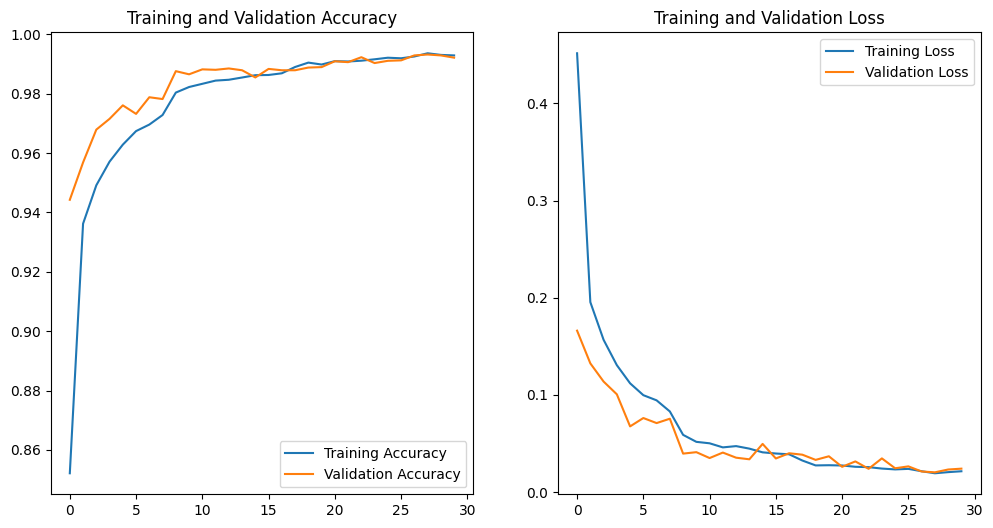

In [2]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()


In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Load the true labels for the test set
true_labels = []
for i in range(len(test_generator)):
    _, batch_labels = test_generator[i]
    true_labels.extend(np.argmax(batch_labels, axis=1))

# Convert the true labels to a numpy array
y_true = np.array(true_labels)

# Predict on the test set
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys(), zero_division=1.0))

207/207 [==============================] - 57s 270ms/step
Confusion Matrix:
[[600   0   0   0   0   0   0   0   0   0   0]
 [  0 600   0   0   0   0   0   0   0   0   0]
 [  0   0 600   0   0   0   0   0   0   0   0]
 [  0   0   1 599   0   0   0   0   0   0   0]
 [  0   0   0   0 598   1   0   0   0   1   0]
 [  0   0   0   1   0 598   0   0   0   0   1]
 [  0   0   0   0   0   0 600   0   0   0   0]
 [  0   0   0   0   3   0   0 597   0   0   0]
 [  0   1   1   0   0   0   0  14 584   0   0]
 [  0   0   0   0   0   0   0   0   0 600   0]
 [  0   0   0   0   0   1   0   1   0   0 598]]

Classification Report:
                       precision    recall  f1-score   support

      Alopecia Areata       1.00      1.00      1.00       600
   Contact Dermatitis       1.00      1.00      1.00       600
         Folliculitis       1.00      1.00      1.00       600
            Head Lice       1.00      1.00      1.00       600
         Healthy Hair       1.00      1.00      1.00       600
   

207/207 [==============================] - 57s 275ms/step


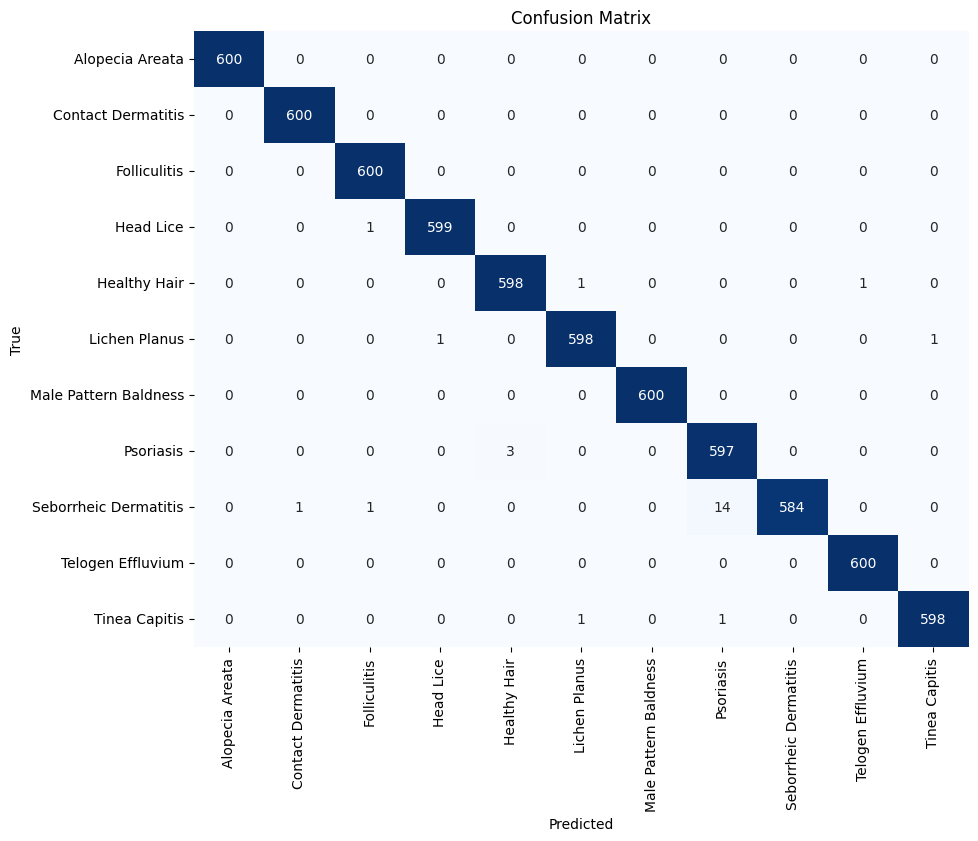


Metrics:
Precision: [1.         0.99833611 0.99667774 0.99833333 0.99500832 0.99666667
 1.         0.9754902  1.         0.99833611 0.99833055]
Recall (Sensitivity/True Positive Rate): [1.         1.         1.         0.99833333 0.99666667 0.99666667
 1.         0.995      0.97333333 1.         0.99666667]
F1 Score: [1.         0.99916736 0.99833611 0.99833333 0.9958368  0.99666667
 1.         0.98514851 0.98648649 0.99916736 0.99749791]
Accuracy: 0.9960606060606061
True Positive Rate (Sensitivity/Recall): [1.         1.         1.         0.99833333 0.99666667 0.99666667
 1.         0.995      0.97333333 1.         0.99666667]
True Negative Rate (Specificity): [0.99833055 0.99833611 1.         0.9754902  1.         0.99666667
 0.99500832 0.99833333 0.99667774 0.99833611 1.        ]

Classification Report:
                       precision    recall  f1-score   support

      Alopecia Areata       1.00      1.00      1.00       600
   Contact Dermatitis       1.00      1.00      1.00 

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the true labels for the test set
true_labels = []
for i in range(len(test_generator)):
    _, batch_labels = test_generator[i]
    true_labels.extend(np.argmax(batch_labels, axis=1))

# Convert the true labels to a numpy array
y_true = np.array(true_labels)

# Predict on the test set
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, f1 score, accuracy, true positive rate, and true negative rate
precision = conf_mat.diagonal() / np.sum(conf_mat, axis=0)
recall = conf_mat.diagonal() / np.sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
true_positive_rate = recall
true_negative_rate = np.diag(conf_mat[::-1, ::-1]) / np.sum(conf_mat[::-1, ::-1], axis=0)

# Display metrics
print("\nMetrics:")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity/True Positive Rate): {recall}")
print(f"F1 Score: {f1_score}")
print(f"Accuracy: {accuracy}")
print(f"True Positive Rate (Sensitivity/Recall): {true_positive_rate}")
print(f"True Negative Rate (Specificity): {true_negative_rate}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=1.0))


1/1 [==============================] - 1s 1s/step


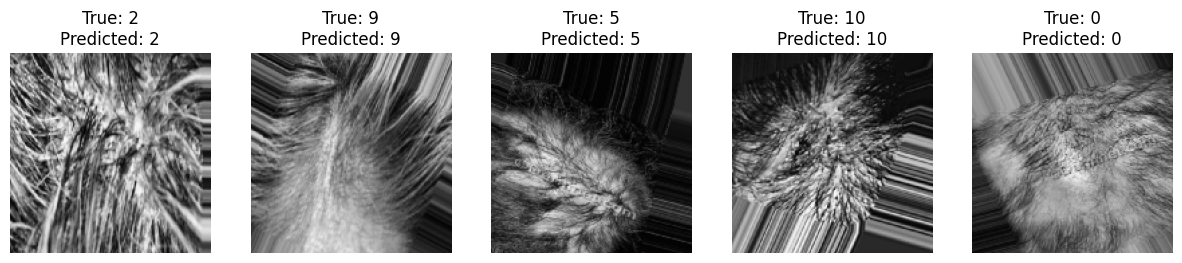

1/1 [==============================] - 0s 283ms/step


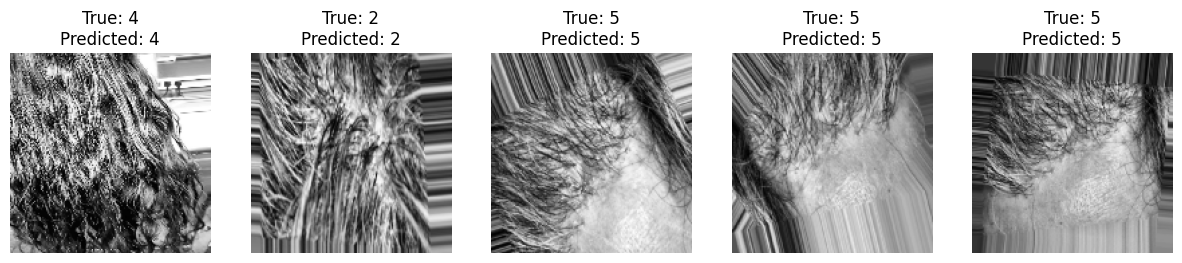

1/1 [==============================] - 0s 275ms/step


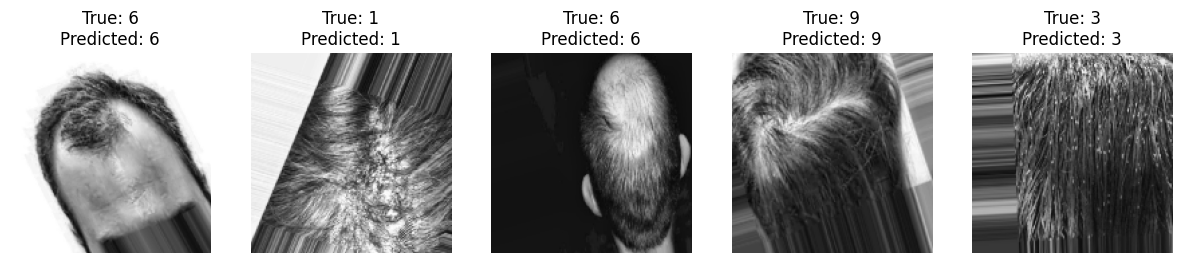

1/1 [==============================] - 0s 299ms/step


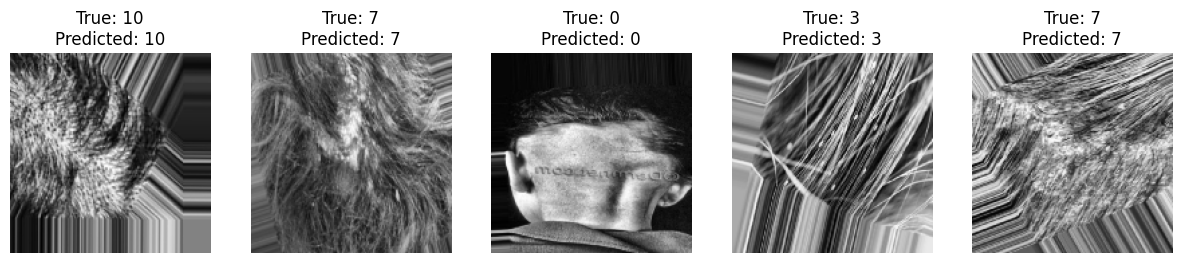

1/1 [==============================] - 0s 267ms/step


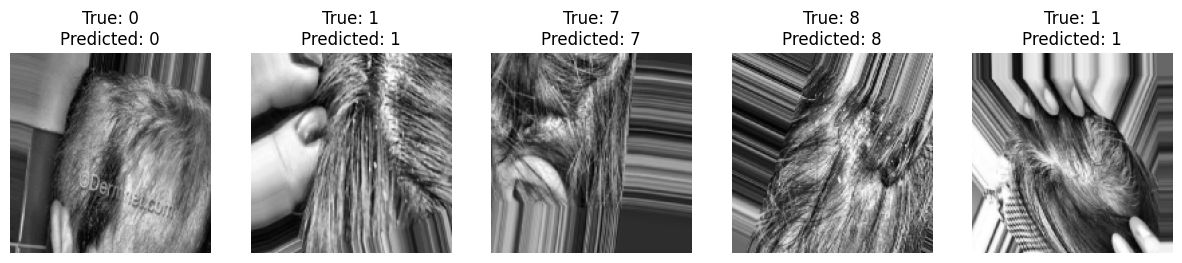

In [6]:
import random
import matplotlib.pyplot as plt

# Choose a random subset of images from the test set
num_images_to_display = 5
random_indices = random.sample(range(len(test_generator)), num_images_to_display)

for i in random_indices:
    # Get a batch of images and labels
    images, batch_labels = test_generator[i]

    # Make predictions for the batch
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Display the images along with true and predicted labels
    plt.figure(figsize=(15, 3))
    num_displayed_images = min(num_images_to_display, images.shape[0])
    for j in range(num_displayed_images):
        plt.subplot(1, num_displayed_images, j + 1)
        plt.imshow(images[j])
        plt.title(f'True: {batch_labels[j].argmax()}\nPredicted: {predicted_labels[j]}')
        plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 295ms/step


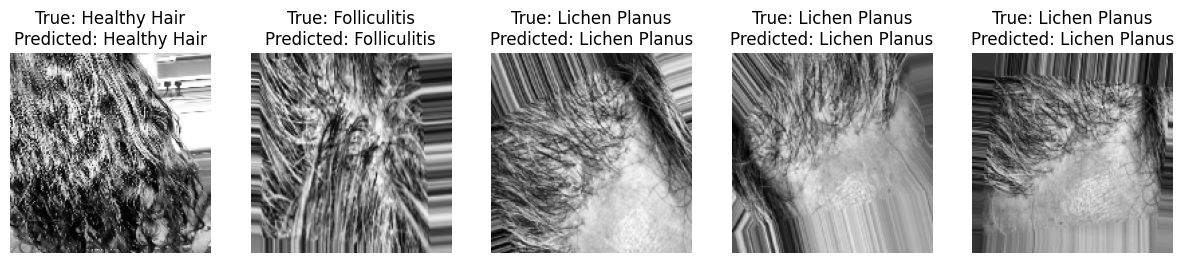

1/1 [==============================] - 0s 275ms/step


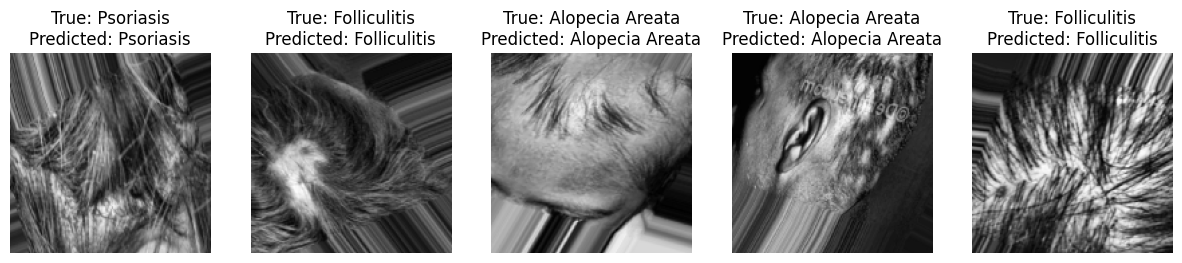

1/1 [==============================] - 0s 286ms/step


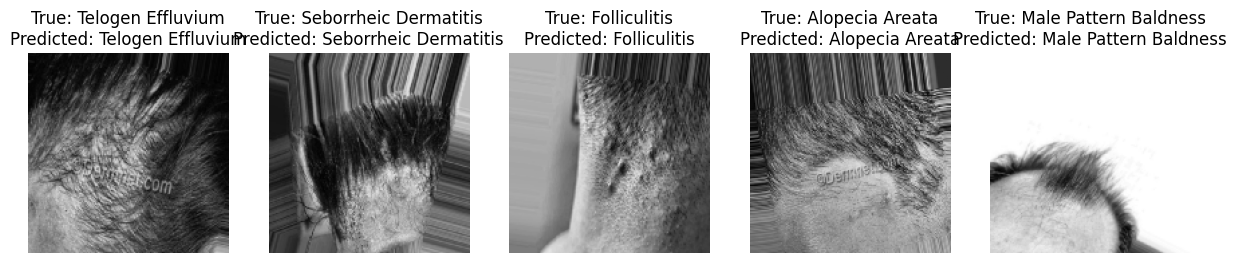

1/1 [==============================] - 0s 274ms/step


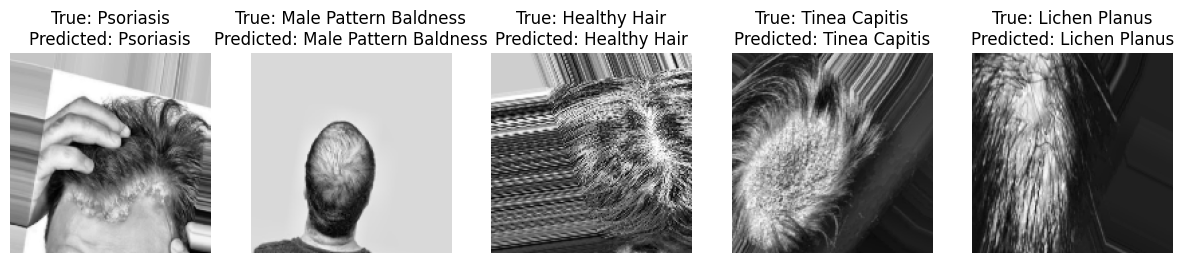

1/1 [==============================] - 0s 302ms/step


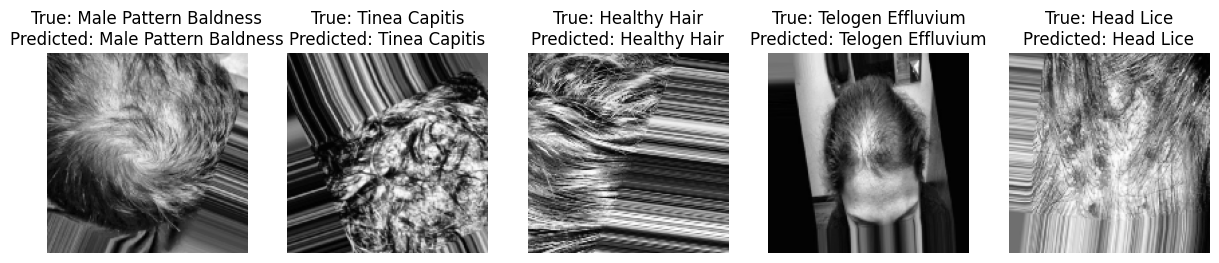

In [7]:
import random
import matplotlib.pyplot as plt

# Mapping of class indices to class names
class_index_to_name = {0: 'Alopecia Areata', 1: 'Contact Dermatitis', 2: 'Folliculitis', 3: 'Head Lice', 4: 'Healthy Hair', 5: 'Lichen Planus', 6: 'Male Pattern Baldness', 7: 'Psoriasis', 8: 'Seborrheic Dermatitis', 9: 'Telogen Effluvium', 10: 'Tinea Capitis'}

# Choose a random subset of images from the test set
num_images_to_display = 5
random_indices = random.sample(range(len(test_generator)), num_images_to_display)

for i in random_indices:
    # Get a batch of images and labels
    images, batch_labels = test_generator[i]

    # Make predictions for the batch
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Display the images along with true and predicted labels and class names
    plt.figure(figsize=(15, 3))
    num_displayed_images = min(num_images_to_display, images.shape[0])
    for j in range(num_displayed_images):
        true_label = class_index_to_name[batch_labels[j].argmax()]  # Convert label index to class name
        predicted_label = class_index_to_name[predicted_labels[j]]  # Convert label index to class name

        plt.subplot(1, num_displayed_images, j + 1)
        plt.imshow(images[j])
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')
    plt.show()


In [11]:
from ipywidgets import FileUpload, Button
from IPython.display import display
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf  # Assuming you're using a TensorFlow/Keras model

# Mapping of class indices to class names
class_index_to_name = {
    0: 'Alopecia Areata', 1: 'Contact Dermatitis', 2: 'Folliculitis',
    3: 'Head Lice', 4: 'Healthy Hair', 5: 'Lichen Planus',
    6: 'Male Pattern Baldness', 7: 'Psoriasis', 8: 'Seborrheic Dermatitis',
    9: 'Telogen Effluvium', 10: 'Tinea Capitis'
}

# Load your pre-trained model (make sure the path to the model is correct)
# Example using a TensorFlow/Keras model
model = tf.keras.models.load_model('inception_v3_finetuned.h5')

# Function to preprocess the uploaded image and make prediction
def predict_image(change):
    uploaded_file = list(uploader.value.values())[0]  # Access the first uploaded file
    content = uploaded_file['content']
    image = Image.open(io.BytesIO(content))
    image = image.resize((64, 64))  # Adjust size as required for your model
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(image_array)
    class_index = np.argmax(prediction[0])
    class_label = class_index_to_name[class_index]

    # Output prediction result
    print("Predicted class:", class_label)

# Create an instance of FileUpload widget
uploader = FileUpload()

# Create a button to trigger prediction
predict_button = Button(description="Predict")

# Event handler for the predict button
def on_predict_button_clicked(b):
    predict_image(None)

predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(uploader)
display(predict_button)


FileUpload(value=(), description='Upload')

Button(description='Predict', style=ButtonStyle())

In [20]:
from ipywidgets import FileUpload, Button, Output
from IPython.display import display, clear_output
import io
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Mapping of class indices to class names
class_index_to_name = {
    0: 'Alopecia Areata', 1: 'Contact Dermatitis', 2: 'Folliculitis',
    3: 'Head Lice', 4: 'Healthy Hair', 5: 'Lichen Planus',
    6: 'Male Pattern Baldness', 7: 'Psoriasis', 8: 'Seborrheic Dermatitis',
    9: 'Telogen Effluvium', 10: 'Tinea Capitis'
}

# Load your pre-trained model (make sure the path to the model is correct)
model = tf.keras.models.load_model('inception_v3_finetuned.h5')

# Output widget for displaying results
output = Output()

# Function to preprocess the uploaded image and make a prediction
def predict_image():
    with output:
        clear_output(wait=True)  # Clear any previous output
        try:
            # Check if the uploader contains a file
            if not uploader.value:
                print("No file uploaded. Please upload an image.")
                return

            # Debug: Check the structure of the uploader.value
            print(f"uploader.value type: {type(uploader.value)}")

            # Extract the first uploaded file content (assuming one file is uploaded)
            uploaded_file = list(uploader.value)[0]  # Accessing the first element of the tuple
            content = uploaded_file['content']

            # Debug: Verify if the content has been loaded properly
            print(f"Uploaded file size: {len(content)} bytes")

            # Open and preprocess the image
            image = Image.open(io.BytesIO(content))

            # Display the uploaded image for verification
            plt.imshow(image)
            plt.axis('off')
            plt.show()

            # Resize image to match model's input size (150x150 as expected by the model)
            image = image.resize((150, 150))
            image_array = np.array(image) / 255.0  # Normalize pixel values
            image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

            # Make prediction
            prediction = model.predict(image_array)

            # Get the predicted class index
            class_index = np.argmax(prediction[0])
            class_label = class_index_to_name[class_index]

            # Output the prediction
            print(f"Predicted class: {class_label}")

        except Exception as e:
            print(f"Error during prediction: {e}")

# Create an instance of the FileUpload widget
uploader = FileUpload(accept='image/*', multiple=False)  # Only accept image files

# Create a button to trigger prediction
predict_button = Button(description="Predict")

# Event handler for the predict button
def on_predict_button_clicked(b):
    if uploader.value:
        predict_image()
    else:
        with output:
            clear_output(wait=True)
            print("No file uploaded. Please upload an image.")

# Connect the button click event to the prediction function
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(uploader)
display(predict_button)
display(output)


FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Predict', style=ButtonStyle())

Output()